In [2]:
# HELP Assignment : Problem statement :
#HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. It runs a lot of operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes.
#After the recent funding programmes, they have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid. 
#And this is where you come in as a data analyst. Your job is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then you need to suggest the countries which the CEO needs to focus on the most.  The datasets containing those socio-economic factors and the corresponding data dictionary are provided below.

#Objectives of the assignment
#Your main task is to cluster the countries by the factors mentioned above using the above key factors that determine the overall 
#development of a country , then we need to suggest countries for whom this moeny can be used effectively.

In [3]:
# STEPS involved in this assigment : 

#  STEP 1 : Reading and understanding the data 
#  STEP 2 : Data Cleaaning 
#  STEP 3 : Data Visualisation 
#  STEP 4 : Data Preparation -Scaling of the data 
#  STEP 5  : Applocation of PCA to the data 
#  STEP 6  : Hopkins statistics Test 
#  STEP 7 :  Model building using K-Means clustering and Silhouete clustering techinique & Hierarchial clustering
#  STEP 8  : Final Analysis 
#  STEP 9  : Final conclusion and recomendation 
 

In [4]:
# STEP 1 : Reading and understanding the data : 
# first let us import the necessary libraries and pacakges needed for reading the dataframe provided . 

import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import math
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")
from datetime import datetime ,timedelta



# importing the necessary libraries that will help us to visualise the data better , this will also reduce the time consuimg of importing
# the necessary data libraries one by one : 

pd.options.display.float_format='{:.4f}'.format 
plt.rcParams['figure.figsize']=[8,8]
pd.set_option('display.max_columns',500)
pd.set_option('display.max_colwidth',-1)
sns.set(style='darkgrid')
import matplotlib.ticker as plticker
%matplotlib inline 


# Importing all the required machinelearning excercise libraries : 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
from sklearn.decomposition import IncrementalPCA
from sklearn.neighbors import NearestNeighbors
from random import sample 
from numpy.random import uniform 
#from math import isnan


# Similarly we shall import the required libraries for clustering exercise :
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram 
from scipy.cluster.hierarchy import cut_tree


In [5]:
#Now after importing the required libraries lets first start reading the dataframe : 
df_help= pd.read_csv(r'C:\Users\amuly\Desktop\HELP Case Study\countires.csv')
df_help.head()


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2000,10.0000,7.5800,44.9000,1610,9.4400,56.2000,5.8200,553
1,Albania,16.6000,28.0000,6.5500,48.6000,9930,4.4900,76.3000,1.6500,4090
2,Algeria,27.3000,38.4000,4.1700,31.4000,12900,16.1000,76.5000,2.8900,4460
3,Angola,119.0000,62.3000,2.8500,42.9000,5900,22.4000,60.1000,6.1600,3530
4,Antigua and Barbuda,10.3000,45.5000,6.0300,58.9000,19100,1.4400,76.8000,2.1300,12200


In [6]:
# checking the shape (number of rows and columns) of the dataframe :
df_help.shape

(167, 10)

In [7]:
# checking the details like mean , std etc of the dataframe :
df_help.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.0000,167.0000,167.0000,167.0000,167.0000,167.0000,167.0000,167.0000,167.0000
mean,38.2701,41.1090,6.8157,46.8902,17144.6886,7.7818,70.5557,2.9480,12964.1557
std,40.3289,27.4120,2.7468,24.2096,19278.0677,10.5707,8.8932,1.5138,18328.7048
min,2.6000,0.1090,1.8100,0.0659,609.0000,-4.2100,32.1000,1.1500,231.0000
25%,8.2500,23.8000,4.9200,30.2000,3355.0000,1.8100,65.3000,1.7950,1330.0000
50%,19.3000,35.0000,6.3200,43.3000,9960.0000,5.3900,73.1000,2.4100,4660.0000
75%,62.1000,51.3500,8.6000,58.7500,22800.0000,10.7500,76.8000,3.8800,14050.0000
max,208.0000,200.0000,17.9000,174.0000,125000.0000,104.0000,82.8000,7.4900,105000.0000


In [8]:
# checking for null values & type of data for each column: 
df_help.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [9]:
# Now that we are done with reading the dataframe , lets now start the cleaning process of the data : 
# STEP 2 : Data Cleaaning :

# inference : from the above we can see that there are no null values in the dataframe  and hence no coputation on this /dropping columns 
# is needed 


In [10]:
# Lets see the datatype :
df_help.dtypes

country       object 
child_mort    float64
exports       float64
health        float64
imports       float64
income        int64  
inflation     float64
life_expec    float64
total_fer     float64
gdpp          int64  
dtype: object

In [11]:
#  Inference : As we can see that the data for the concerned variables seems to be clear with no discrepancies ,means that the data has the 
# correct type of data is assigned for the correct column . 

In [12]:
# Now checking for duplicates in the dataframe :
df_help.loc[df_help.duplicated()]
# inference : There seems to be no duplicates in the dataframe 


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp


In [13]:
# checking for numerical and categorical variables :
cat_var=df_help.select_dtypes(include=['object']).columns
num_var=df_help.select_dtypes(exclude=['object']).columns
cat_var
num_var

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [14]:
#inference : we can find that there are no categorical variables and the numerical variables are correct and hence the data is clean by itself 
# and no further activities is needed

In [15]:
# STEP 3 : DATA VISUALISATION : 
#Lets see how actually the data is spread , the relationship between the x and y variables and the relationship among the variables 
# themselves from which we can have a fair idea of the dependent and independent variables .for this we use heatmap, boxplot 
# & scatter plots to visualise the data .

(9.0, 0.0)

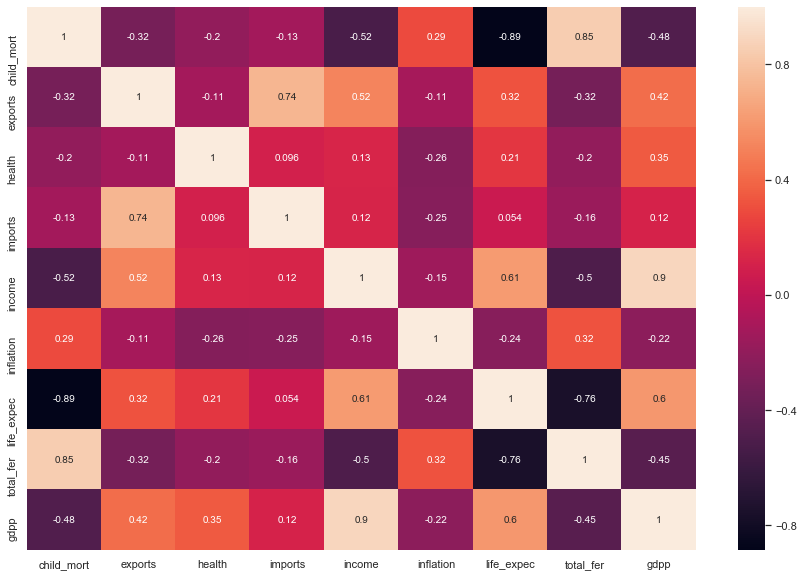

In [16]:
# Lets first look at heatmap for understanding the corelation among the variables :
plt.figure(figsize=(15,10))
ax=sns.heatmap(df_help.corr(),annot=True)
bottom,top =ax.get_ylim()
ax.set_ylim(bottom+0.5,top-0.5)

In [17]:
# Heatmap-Inference : 
# 1) We can see that child mortality and life expentancy are highly negatively correlated with a correlation pf -0.89
# 2) Imports and exports are highly correlated with positive correlation of 0.74 
# 3) Similarly total_fertility and child mortality are highly correlated with 0.85
# 4) life expentancy and total_fertility are highly negatively corelated with  -0.76
#5)  Similarly income and GDP are highly positively correlated with 0.90 asthe correlation rate .

# Thus we need to consider the above points /variables for clustering the countries into similar clusters .Now lets see the relation 
# or rather the spread of the data among the different numerical variables :

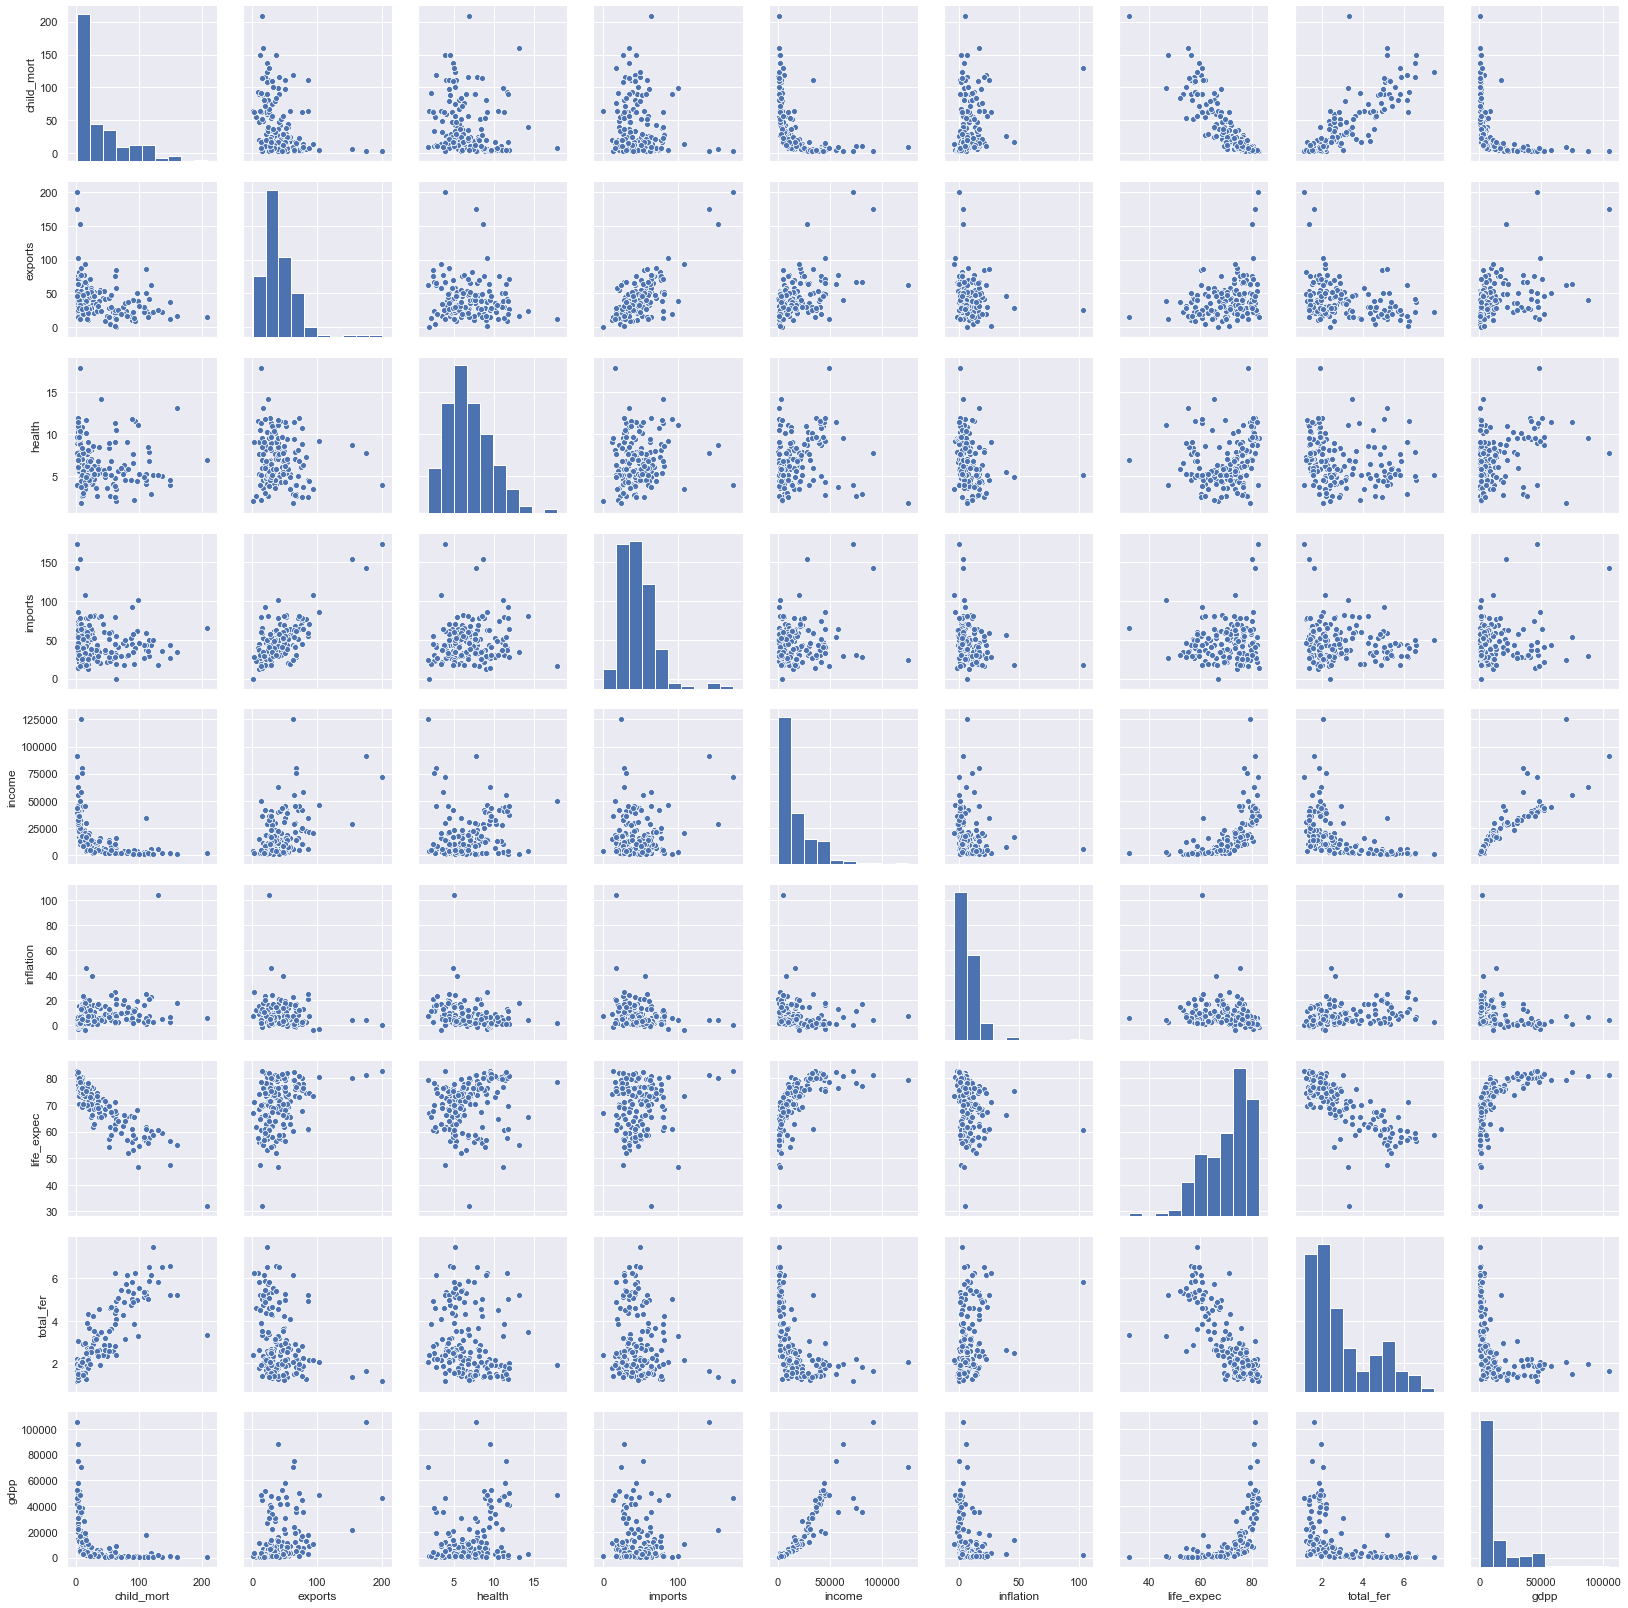

In [18]:
# Pairplot of numeric columns :
sns.pairplot(df_help)

In [19]:
# inference : Thus we can see that though the datapoints for the concerned variables are scattered but still they are concentrated around a few points , in particluar
#  we can also notice the relationship between one variable with the other .Now lets work on Data preparation step for model building :

In [20]:
# STEP 4 : Data Preparation : 

# We shall now see the data to understand the exports , imports and health factors of the countries along with other variables :

In [21]:
df_help.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2000,10.0000,7.5800,44.9000,1610,9.4400,56.2000,5.8200,553
1,Albania,16.6000,28.0000,6.5500,48.6000,9930,4.4900,76.3000,1.6500,4090
2,Algeria,27.3000,38.4000,4.1700,31.4000,12900,16.1000,76.5000,2.8900,4460
3,Angola,119.0000,62.3000,2.8500,42.9000,5900,22.4000,60.1000,6.1600,3530
4,Antigua and Barbuda,10.3000,45.5000,6.0300,58.9000,19100,1.4400,76.8000,2.1300,12200
5,Argentina,14.5000,18.9000,8.1000,16.0000,18700,20.9000,75.8000,2.3700,10300
6,Armenia,18.1000,20.8000,4.4000,45.3000,6700,7.7700,73.3000,1.6900,3220
7,Australia,4.8000,19.8000,8.7300,20.9000,41400,1.1600,82.0000,1.9300,51900
8,Austria,4.3000,51.3000,11.0000,47.8000,43200,0.8730,80.5000,1.4400,46900
9,Azerbaijan,39.2000,54.3000,5.8800,20.7000,16000,13.8000,69.1000,1.9200,5840


In [22]:
# inference : As you can see above that the columns exports , imports , health factors inflation are not able to give the right pricture 
# on their own but can be understood or derived better stand when looked along with other variable -Here we shall take GDP as the 
# stand or basis to derive at the correct figures of these columns for the individual variables . this concept is called dervied metrics

In [23]:
# Understanding few variables or metrics from GDP stand point for better inferences :
df_help['exports']=df_help['exports']*df_help['gdpp']/100
df_help['imports']=df_help['imports']*df_help['gdpp']/100
df_help['inflation']=df_help['inflation']*df_help['gdpp']/100
df_help['health']=df_help['health']*df_help['gdpp']/100
#inference : taking the above varaiables as such may not add much value for our analysis and hence we shall try to check them on par with 
# gdpp , which is one of the key paraameters of seggregrtion of the countries /decide which countries are better and whcih are not

In [24]:
df_help.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2000,55.3000,41.9174,248.2970,1610,52.2032,56.2000,5.8200,553
1,Albania,16.6000,1145.2000,267.8950,1987.7400,9930,183.6410,76.3000,1.6500,4090
2,Algeria,27.3000,1712.6400,185.9820,1400.4400,12900,718.0600,76.5000,2.8900,4460
3,Angola,119.0000,2199.1900,100.6050,1514.3700,5900,790.7200,60.1000,6.1600,3530
4,Antigua and Barbuda,10.3000,5551.0000,735.6600,7185.8000,19100,175.6800,76.8000,2.1300,12200


In [25]:
# Lets drop the names of the countries as the PCA calculation  shall contain only the concerned columns . Hence we shall drop the country 
# names for better understanding of the PCAs of the individual columns :

df_help_drop=df_help.copy()
country=df_help_drop.pop('country')

In [26]:
df_help_drop.head()
# Now we can see that the country column does not appear , this is done for ease of the PCAs.

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2000,55.3000,41.9174,248.2970,1610,52.2032,56.2000,5.8200,553
1,16.6000,1145.2000,267.8950,1987.7400,9930,183.6410,76.3000,1.6500,4090
2,27.3000,1712.6400,185.9820,1400.4400,12900,718.0600,76.5000,2.8900,4460
3,119.0000,2199.1900,100.6050,1514.3700,5900,790.7200,60.1000,6.1600,3530
4,10.3000,5551.0000,735.6600,7185.8000,19100,175.6800,76.8000,2.1300,12200


In [27]:
# Rescaling Features : its assumed that the data is already scaled /centred and thus we apply to do standardisation/normalisation 
# of the data for rescaling purposes : The rescaling process is done in two ways :
# 1)Min-Max scaling 
# 2) Standardisation (with mean =0 , sigma = 1)

In [28]:
# Applying the standardisation technique for scaling :

warnings.filterwarnings("ignore")
scaler=StandardScaler()
df_help_scaled=scaler.fit_transform(df_help_drop) # since we are using this dataframe after dropping the country column for PCA

In [29]:
df_help_scaled

array([[ 1.29153238, -0.4110113 , -0.56503989, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.35019096, -0.43921769, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.31852577, -0.48482608, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541, -0.36146329, -0.53848844, ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.39216643, -0.55059641, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.38395214, -0.54049845, ..., -2.09278484,
         1.6246091 , -0.62954556]])

In [30]:
# STEP 5 :  PCA application on the variables :Understanding the concept of PCA

# PCA analysis is one of the poerful method that uses the concept of dimensionality reduction technique . This PCA concept is used when 
# the data contains more number of varaibles /when we want to reduce the large data to smaller size , without losing the 
# original valuable information of the dataframe . By this dimensionality reduction technique the model can be improved with better performance, 
# visualising complex data in smaller chunks , and helps to analayse /frame the clusters much better for ease of intrepretation

In [31]:
# WHY PCA for this dataframe : 
# This dataframe contains many variables and large data of countries and to do a critical task of clustering the countries and 
# proper utilisation of the funds , its important to understand what factors can be helpful for us to cluster the countries together 
# and identify such clusters as our target ones to utilise the funds properly.We also notethat there exists relationship between the varaiables themselves

In [32]:
pca=PCA(svd_solver='randomized',random_state=42)

In [33]:
# Applying PCA on scaled data :
pca.fit(df_help_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='randomized', tol=0.0, whiten=False)

In [34]:
# PCA components created :
pca.components_

array([[-3.04398325e-01,  3.45234858e-01,  3.51392110e-01,
         3.42482596e-01,  3.89766121e-01,  1.98223033e-01,
         3.34703015e-01, -2.88627917e-01,  4.01050652e-01],
       [ 5.06547942e-01,  3.56994215e-01,  1.11276141e-01,
         3.21558258e-01,  1.20200492e-01,  2.24418347e-01,
        -4.09638641e-01,  4.88316657e-01,  1.70626767e-01],
       [-3.11368022e-02, -2.13229790e-01, -2.29352324e-01,
        -3.20687304e-01,  2.51164094e-01,  8.56183108e-01,
         1.98918986e-02,  2.41131156e-02, -3.17911073e-02],
       [-1.46482725e-01,  4.30680283e-01, -6.60773681e-01,
         4.14033682e-01, -7.11837072e-02,  9.35371833e-02,
        -1.91072655e-02, -2.00101203e-01, -3.61648522e-01],
       [ 2.15215488e-01, -4.81797274e-02,  7.14598575e-02,
        -6.23594155e-02,  1.28301750e-01, -8.58217476e-03,
        -6.19685740e-01, -7.33255405e-01,  6.44740378e-02],
       [ 1.41410553e-01, -3.58297951e-02, -4.05526235e-01,
        -1.78933057e-01,  7.66731683e-01, -4.047075

In [35]:
# Explaining the varaiance ratio : 
pca.explained_variance_ratio_

array([5.99243801e-01, 1.84936487e-01, 1.02219558e-01, 6.01144754e-02,
       2.53296012e-02, 1.68258088e-02, 9.31444797e-03, 1.55434065e-03,
       4.61480497e-04])

Text(0, 0.5, 'Variance Ratio')

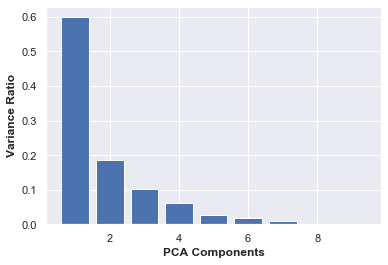

In [36]:
# Lets plot the above variance ratio on a bar plot for better understanding of each of the PCA components :
ax1=plt.bar(range(1,len(pca.explained_variance_ratio_)+1),pca.explained_variance_ratio_)
plt.xlabel("PCA Components" , fontweight = 'bold')
plt.ylabel("Variance Ratio",fontweight='bold')

In [37]:
# Inference : We can see that out of the total 8 components mentioned above , variance of the first component is explained by nearly 60% ,
# second component variance is explained by 20% , third ones by nearly 10%.As you can see if we can combine the four or five 
# principal components we shall be able to explain nearly 95 to 96% variance in the data . 

# Key Notes :

# Lets plot the above varaince among the components in the form of a cumulative graph which shows the cumulative percentange of varaince 
# that is explained by the components of the dataframe . This graph helps us to understand , combinedly the variance explained by one or 
# two or more components together and thereby we can take these components as a basis for clustering .  With this , by forming cluster countries we can see where to 
# spend the amount much better.This in turn will also aid us to focus on such key areas along with other economic /social /geographical factors for the improvement of such areas within the cluster.

Text(0, 0.5, 'Cumulative Explianed Variance of Variables')

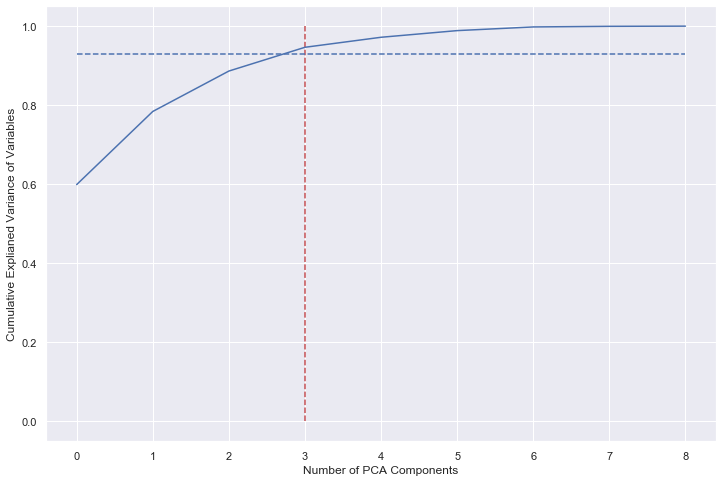

In [38]:
# Cumulative Variance of the components using Scree plot - Visualisation:

fig=plt.figure(figsize=(12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.vlines(x=3,ymax=1,ymin=0,colors="r",linestyles="--")
plt.hlines(y=0.93,xmax=8,xmin=0,colors="b",linestyles="--")
plt.xlabel('Number of PCA Components')
plt.ylabel('Cumulative Explianed Variance of Variables')

In [39]:
# inference : We can see from the screeplot that more than 90% of the variance in the data is explained by the first three principal Components
# Thus we shall consider these Principal components for outr further analysis and clustering of countries 

In [40]:
# Checking the key attributes that are well explianed by PCA:

main_col = list(df_help.drop(['country'],axis=1).columns)
attributes_pca=pd.DataFrame({'Attribute':main_col,'PC_1':pca.components_[0],'PC_2':pca.components_[1],'PC_3':pca.components_[2]})

In [41]:
attributes_pca

,Attribute,PC_1,PC_2,PC_3
0,child_mort,-0.3044,0.5065,-0.0311
1,exports,0.3452,0.3570,-0.2132
2,health,0.3514,0.1113,-0.2294
3,imports,0.3425,0.3216,-0.3207
4,income,0.3898,0.1202,0.2512
5,inflation,0.1982,0.2244,0.8562
6,life_expec,0.3347,-0.4096,0.0199
7,total_fer,-0.2886,0.4883,0.0241
8,gdpp,0.4011,0.1706,-0.0318


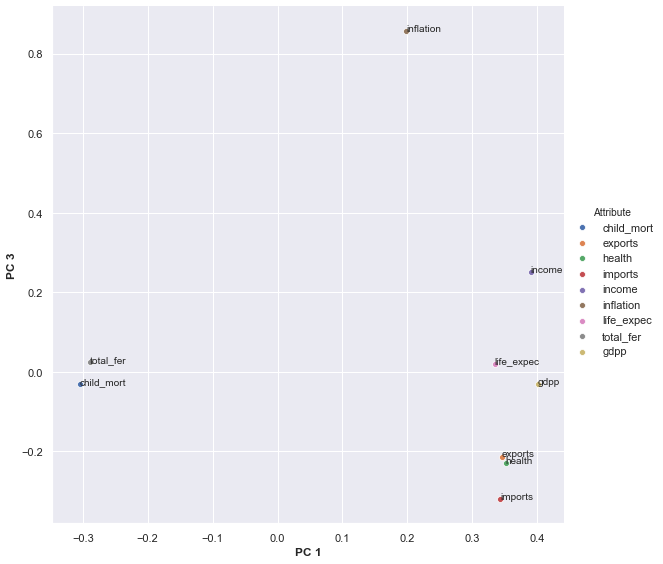

In [42]:
# Using the pairplot to plot the above attributes and their PCA varaince explanation for PC1,PC2:

sns.pairplot(data=attributes_pca,x_vars=["PC_1"],y_vars=["PC_3"],hue="Attribute",height=8)
plt.xlabel("PC 1", fontweight='bold')
plt.ylabel("PC 3",fontweight='bold')

for i,txt  in enumerate(attributes_pca.Attribute):
    plt.annotate(txt,(attributes_pca.PC_1[i],attributes_pca.PC_3[i]))
    

In [43]:
# inference : We can see that inflation is well explained by the PCA 3 . as we can see that nearly 90% of the varaince is explained by the 
# three Principal components , PC1,PC2&PC3, we can try to build our dataframe using the above three components only . 

# Building dataframe using Incremental PCA for better efficiency :

inc_pca=IncrementalPCA(n_components=3)

In [44]:
# Now lets fit the scaled dataframe on the incremental PCA :

df_inc_pca=inc_pca.fit_transform(df_help_scaled)
df_inc_pca

array([[-2.65406253e+00,  1.57686067e+00, -2.49317201e-01],
       [-1.62484084e-01, -1.44302061e+00, -1.00049272e-01],
       [-3.30207139e-01, -7.91346939e-01,  3.64809751e-01],
       [-2.42640643e+00,  2.15045139e+00,  2.82106559e-01],
       [ 4.72143236e-01, -1.02817205e+00, -2.07716292e-01],
       [ 4.73156518e-01, -6.53433748e-01,  1.41720297e+00],
       [-4.14112623e-01, -1.31691459e+00, -6.74563302e-02],
       [ 3.06288638e+00, -3.81474226e-01, -1.91156238e-01],
       [ 3.65476808e+00,  7.67393856e-03, -8.41872275e-01],
       [-3.52363684e-01, -5.28043822e-01,  4.00072546e-01],
       [ 1.24426857e+00, -5.30139784e-01, -7.36332469e-01],
       [ 1.62542445e+00, -2.39994619e-01,  8.67880190e-01],
       [-1.12160514e+00, -7.16655112e-01, -2.34942488e-01],
       [ 6.24449538e-01, -1.03814951e+00, -4.49788205e-01],
       [ 1.21509760e-01, -1.07305466e+00,  4.37289784e-01],
       [ 3.89200221e+00,  6.17599613e-01, -8.84776145e-01],
       [-5.96675328e-01, -8.49054329e-01

In [45]:
# Dataframe is now newly created with principal components :

df_pcas=pd.DataFrame(df_inc_pca,columns=["PC_1","PC_2","PC_3"])
df_pcas_final=pd.concat([country,df_pcas],axis=1)
df_pcas_final.head(10)

,country,PC_1,PC_2,PC_3
0,Afghanistan,-2.6541,1.5769,-0.2493
1,Albania,-0.1625,-1.4430,-0.1000
2,Algeria,-0.3302,-0.7913,0.3648
3,Angola,-2.4264,2.1505,0.2821
4,Antigua and Barbuda,0.4721,-1.0282,-0.2077
5,Argentina,0.4732,-0.6534,1.4172
6,Armenia,-0.4141,-1.3169,-0.0675
7,Australia,3.0629,-0.3815,-0.1912
8,Austria,3.6548,0.0077,-0.8419
9,Azerbaijan,-0.3524,-0.5280,0.4001


(3.0, 0.0)

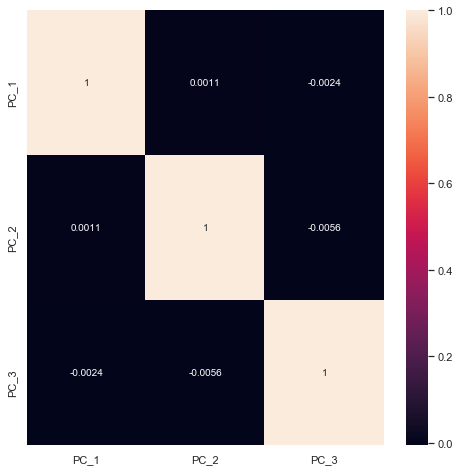

In [46]:
# Plotting heatmap for dependency checking of the dataframe:

plt.figure(figsize=(8,8))
ax=sns.heatmap(df_pcas_final.corr(),annot=True)
bottom,top=ax.get_ylim()
ax.set_ylim(bottom+0.5 , top -0.5)

In [47]:
# Inference : As you can see from the above that the correlation among the PCAs is almost zero and hence we can continue with this
# dataframe for our further analysis /clustering 


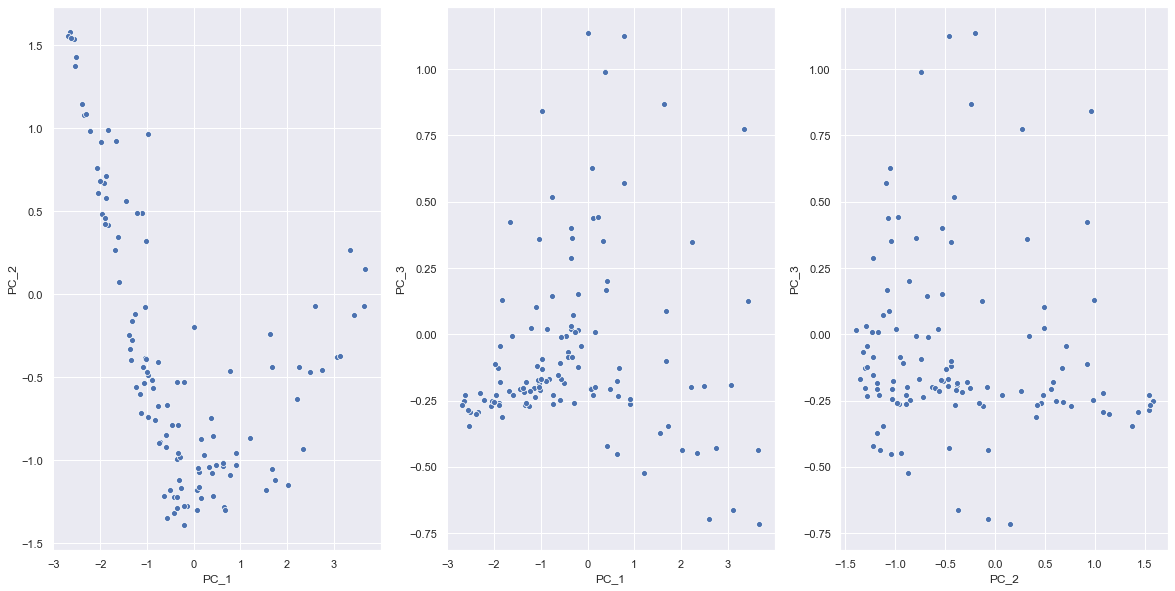

In [57]:
# Lets plot the same on a scatter plot - PC1,PC2,PC3:

plt.figure(figsize=(20,10))
plt.subplot(1,3,1)
sns.scatterplot(data=df_pcas_final,x='PC_1',y='PC_2')
plt.subplot(1,3,2)
sns.scatterplot(data=df_pcas_final,x="PC_1",y="PC_3")
plt.subplot(1,3,3)
sns.scatterplot(data=df_pcas_final,x="PC_2",y="PC_3")
#inference: as you can see that the variation between PC1 & PC2 components are scattered all over the axis (-3&3)and most of the points in between -1,1
#inference : With respect to PC1&PC3 , we do not find that much variance between the datapoints but only few points are centered -0.25&1
# inference : with resspect to PC2&PC3,most of the points are spread between -1.5&1.5 and also the points are scattered all over.

In [49]:
# OUTLIER TREATMENT AND ANALYSIS :
# Outliers are of two types as we need to treat these outliers :

# ----> Statistical & Domain specific 


Text(0.5, 1.0, 'Outliers treatment and distribution')

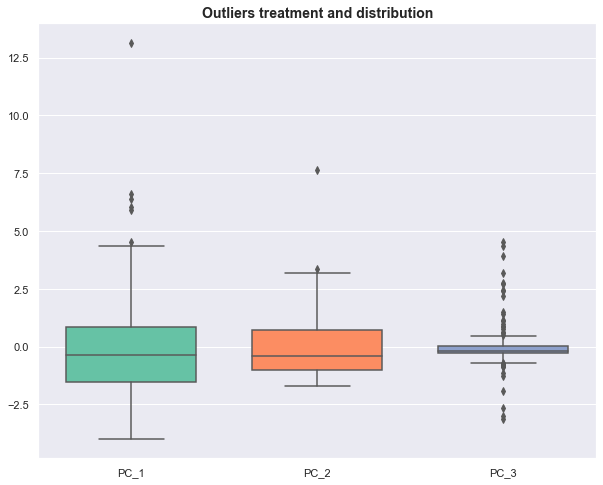

In [50]:
outliers = ['PC_1','PC_2','PC_3']
plt.rcParams['figure.figsize']=[10,8]
sns.boxplot(data=df_pcas_final[outliers],orient="v",palette="Set2",whis=1.5,saturation=1,width=0.70)
plt.title("Outliers treatment and distribution",fontsize=14,fontweight='bold')

In [51]:
# Lets work on the statistical treatment of Outlier for PC_1:

Q1=df_pcas_final.PC_1.quantile(0.05)
Q3=df_pcas_final.PC_1.quantile(0.95)
IQR=Q3-Q1
df_pcas_final=df_pcas_final[(df_pcas_final.PC_1 >= Q1) & (df_pcas_final.PC_1 <= Q3)]

# Lets work on the statistical treatment of Outlier for PC_2:

Q1=df_pcas_final.PC_2.quantile(0.05)
Q3=df_pcas_final.PC_2.quantile(0.95)
IQR=Q3-Q1
df_pcas_final=df_pcas_final[(df_pcas_final.PC_2 >= Q1) & (df_pcas_final.PC_2 <= Q3)]

# Lets work on the statistical treatment of Outlier for PC_3:


Q1=df_pcas_final.PC_3.quantile(0.05)
Q3=df_pcas_final.PC_3.quantile(0.95)
IQR=Q3-Q1
df_pcas_final=df_pcas_final[(df_pcas_final.PC_3 >= Q1) & (df_pcas_final.PC_3 <= Q3)]



Text(0.5, 0, 'PC Components')

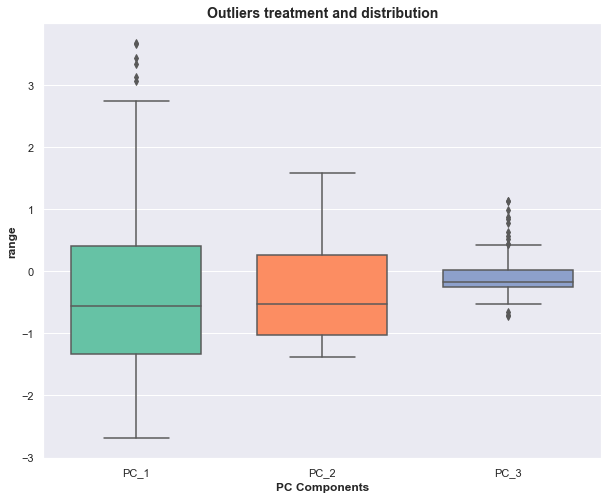

In [52]:
# Plotting the data for checking the outliers:

outliers=['PC_1','PC_2','PC_3']
plt.rcParams['figure.figsize']=[10,8]
sns.boxplot(data=df_pcas_final[outliers],orient="v",palette="Set2",whis=1.5,saturation=1,width=0.70)
plt.title("Outliers treatment and distribution",fontsize=14,fontweight='bold')
plt.ylabel("range",fontweight='bold')
plt.xlabel("PC Components",fontweight='bold')

# inference -outliers : Though we can see that there are countries that are ouside the Q3zone , probably due to the fact that they 
# might have huge variance with respect to any componenets like Child mortality , income and gdpp when compared to other countries
# and these may need more economic support from the HELP organisation . Thus its not fair to remove any outliers in this assignment

#as it might lead to some countries are left out where they need help actually.

In [53]:
# Lets look at the dataframe post the above outlier treatment : 

df_pcas_final.head()
#df_pcas_final_data=df_pcas_final.add(['country'],axis=1)




,country,PC_1,PC_2,PC_3
0,Afghanistan,-2.6541,1.5769,-0.2493
2,Algeria,-0.3302,-0.7913,0.3648
4,Antigua and Barbuda,0.4721,-1.0282,-0.2077
6,Armenia,-0.4141,-1.3169,-0.0675
7,Australia,3.0629,-0.3815,-0.1912


In [60]:
df_pcas_final=df_pcas_final.reset_index(drop=True)
df_pcas_final_da=df_pcas_final.drop(['country'],axis=1)
df_pcas_final_da.head()

,PC_1,PC_2,PC_3
0,-2.6541,1.5769,-0.2493
1,-0.3302,-0.7913,0.3648
2,0.4721,-1.0282,-0.2077
3,-0.4141,-1.3169,-0.0675
4,3.0629,-0.3815,-0.1912


In [54]:
df_help.head()


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2000,55.3000,41.9174,248.2970,1610,52.2032,56.2000,5.8200,553
1,Albania,16.6000,1145.2000,267.8950,1987.7400,9930,183.6410,76.3000,1.6500,4090
2,Algeria,27.3000,1712.6400,185.9820,1400.4400,12900,718.0600,76.5000,2.8900,4460
3,Angola,119.0000,2199.1900,100.6050,1514.3700,5900,790.7200,60.1000,6.1600,3530
4,Antigua and Barbuda,10.3000,5551.0000,735.6600,7185.8000,19100,175.6800,76.8000,2.1300,12200


In [55]:
# STEP 6 : Hopkins statistics test :
# The Hopkins statistic test is a way of measuring the cluster tendency of a data set . It will help us to identify if the data is uniformly
# distributed or not . A value close to 1 tends to indicate the data is highly clustered , random data will tend toresult in values 
# around 0.5,and uniformly distributed  data will tend to result in values closer to 0

# inference: for doing this Hopkins test , we need all the data in numeric only but not in object ,hence we had removed the field 
# "country" from the database and then treated index as the key . 

In [73]:
# Checking the Hopkins test to see if the dataframe is suitable for clustering or not. 
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan

def hopkins_test(X):
    d=X.shape[1]
    n=len(X)
    m=int(0.1*n)
    nbrs=NearestNeighbors(n_neighbors=1).fit(X.values)
    
    rand_X=sample(range(0,n,1),m)
    
    ujd=[]
    wjd=[]
    
    for j in range(0,m):
        
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1,-1),2,return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _= nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1,-1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
        
    HS=sum(ujd)/(sum(ujd)+sum(wjd))
    
    if isnan(HS):
        print(ujd, wjd)
        HS=0
        
    return HS

        

In [75]:
#getting Hopikins score :
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan

print(hopkins_test(df_pcas_final_da))

0.8095855221476216


In [ ]:
# Inference : 0.81 is a good score of Hopkins test for clustering 

In [ ]:
# SETP7 : K MEANS CLUSTERING :

# Note : K means clustering is one of the simplest and most popular unsupervised learning algorithms.

# Here we shall initialise the K points or means randomly , then we shall catrgorize the data points to the nearest clusters based on 
# the mean distance and then we update the mean's coorrdinates who are the average of the items classified so far . This process is repeated 
# till the data points converge .

In [ ]:
# for fiding the value of K or the number of clusters , we use the elbow curve method to find the optimal value of k 

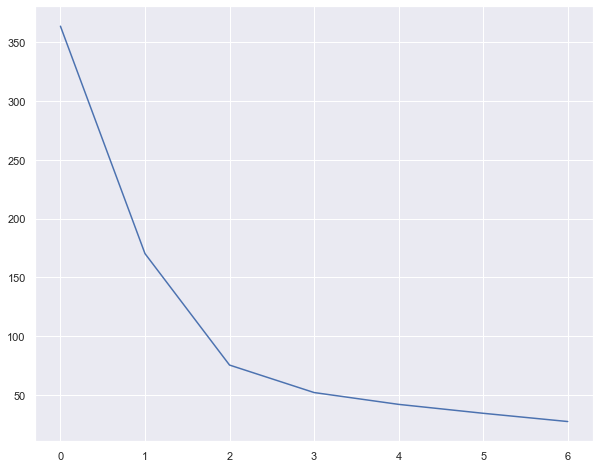

In [76]:
ssd=[]

for num_clusters in list(range(1,8)):
    m_cu=KMeans(n_clusters=num_clusters,max_iter=50,random_state=100)
    m_cu.fit(df_pcas_final_da)
    ssd.append(m_cu.inertia_)
    
plt.plot(ssd)
    

In [ ]:
# inference : Looking at the above steep of the elbow curve , we can conclude that its better to go with 4/5 clusters for this assignment
# Lets look at the formula for Silhouette Score to decide if the datapoints are similar to each other in the cluster that is formed . 

# Silhouette Score is denoted by the formula : p-q/maximum(p,q)

# Here p-> mean distance of the points to the nearest cluster that the datapoints are not a part of such cluster 
# here q-> mean intra-clsuter distance of the datapoints within the same /common cluster 

# interpretation of the score : 
   #  the value of the silhouette score lies between -1 to +1 
   #  a score of 1 indicates that the datapoints are similar to the other datapoints within its own cluster 
   #  a score of -1 indicxates that the datapoints are not similar to other datapoints within its own cluster 
    
# Applying the silhoueette score to the dataframe /cluster data points for finding the ideal number of clusters that can be formed for our assignment 
    
    

In [79]:
range_clust=[2,3,4,5,6,7,8]

for n_clusters in range_clust:
    kmeans=KMeans(n_clusters,max_iter=50 , random_state=100)
    kmeans.fit(df_pcas_final_da)
    
    cluster_labels1=kmeans.labels_
# calculation of silhoutte score :
    silhouette_avg=silhouette_score(df_pcas_final_da,cluster_labels1)
    print("For n_clusters={0}, silhouette score is {1}".format(n_clusters,silhouette_avg))
    

For n_clusters=2, silhouette score is 0.45394516132164286
For n_clusters=3, silhouette score is 0.5223797968090416
For n_clusters=4, silhouette score is 0.45720278436187384
For n_clusters=5, silhouette score is 0.4197723098014591
For n_clusters=6, silhouette score is 0.41473857391860225
For n_clusters=7, silhouette score is 0.4121381300264857
For n_clusters=8, silhouette score is 0.4272143258199951


In [80]:
# lets check for k=4 clusters :
clust_4=KMeans(n_clusters=4,max_iter=50 , random_state=100)
clust_4.fit(df_pcas_final_da)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=100, tol=0.0001, verbose=0)

In [81]:
# finding cluster labels :
clust_4.labels_

array([3, 2, 2, 2, 0, 2, 0, 1, 2, 2, 1, 3, 1, 1, 1, 2, 2, 1, 3, 0, 1, 2,
       2, 2, 3, 3, 2, 0, 2, 2, 1, 2, 3, 2, 1, 0, 3, 3, 2, 0, 3, 0, 2, 1,
       1, 2, 0, 1, 1, 2, 1, 0, 0, 2, 1, 2, 3, 3, 1, 3, 2, 3, 3, 2, 2, 3,
       3, 2, 2, 0, 3, 2, 1, 2, 1, 1, 1, 3, 1, 0, 3, 2, 1, 2, 1, 2, 0, 2,
       2, 3, 1, 3, 2, 1, 1, 0, 0, 2, 2, 3, 2, 0, 1, 3, 3, 3, 1, 2, 2, 1,
       3, 2, 0, 0, 2, 1, 1, 2, 3])

In [82]:
# lets assign the cluster labels for our countires :
df_pcas_final['cluster_number']=clust_4.labels_
df_pcas_final.head()

,country,PC_1,PC_2,PC_3,cluster_number
0,Afghanistan,-2.6541,1.5769,-0.2493,3
1,Algeria,-0.3302,-0.7913,0.3648,2
2,Antigua and Barbuda,0.4721,-1.0282,-0.2077,2
3,Armenia,-0.4141,-1.3169,-0.0675,2
4,Australia,3.0629,-0.3815,-0.1912,0


In [83]:
# Lets check the total number of countries in each cluster :
df_pcas_final['cluster_number'].value_counts()

2    43
1    31
3    27
0    18
Name: cluster_number, dtype: int64

In [ ]:
# inference: we can see that the number of countries in each cluster is good to go as per the above numbers as they seem to conatin a 
# fair number in all the clusters . so we can chose k=4 now

# lets plot these on a scatter plot :



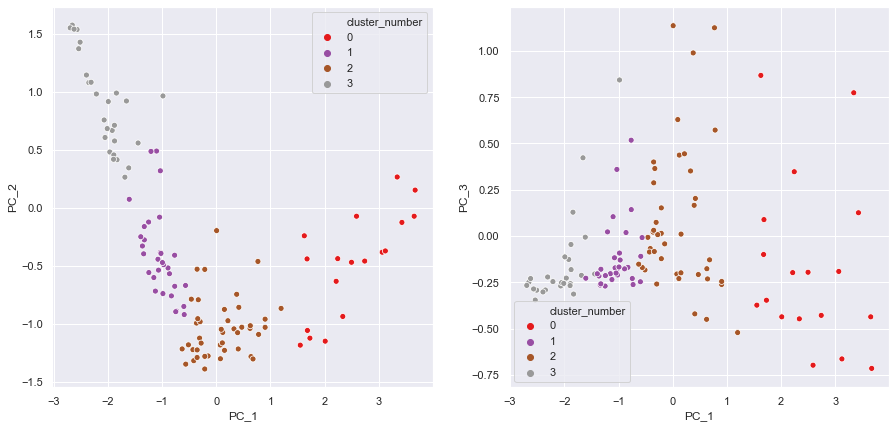

In [85]:
# scatter plot of principal components : 

fig,axes =plt.subplots(1,2,figsize=(15,7))
sns.scatterplot(x='PC_1', y='PC_2', hue='cluster_number',legend='full',palette="Set1",data=df_pcas_final,ax=axes[0])
sns.scatterplot(x='PC_1', y='PC_3', hue='cluster_number',legend='full',palette="Set1",data=df_pcas_final,ax=axes[1])


In [ ]:
# inference : we can see that the is much distance between the cluster points and hence we need to consider forming k=5 number of clsusters 
# for better reduction of the intra distance between the clusters 

In [86]:
# creating the 5 clusters :
df_pcas_final=df_pcas_final.drop('cluster_number',axis=1)

In [87]:
#K means clustering with k=5 clusters :

clust_5=KMeans(n_clusters=5,max_iter=50 , random_state=100)
clust_5.fit(df_pcas_final_da)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=100, tol=0.0001, verbose=0)

In [88]:
# cluster_labels :
clust_5.labels_

array([1, 4, 4, 4, 3, 4, 0, 2, 0, 4, 4, 1, 2, 2, 2, 4, 4, 2, 1, 3, 2, 0,
       4, 4, 1, 1, 0, 3, 4, 4, 2, 4, 1, 0, 2, 3, 1, 1, 4, 3, 1, 0, 4, 2,
       2, 0, 3, 2, 2, 4, 2, 0, 3, 4, 4, 4, 1, 1, 2, 1, 4, 1, 1, 0, 0, 1,
       1, 4, 4, 3, 1, 4, 2, 4, 2, 2, 2, 1, 2, 3, 1, 4, 4, 4, 2, 0, 0, 4,
       4, 1, 2, 1, 0, 2, 2, 0, 0, 4, 4, 1, 4, 3, 2, 1, 1, 1, 2, 4, 4, 2,
       1, 4, 3, 3, 4, 2, 2, 4, 1])

In [89]:
# assigning the labels to the dataframe :
df_pcas_final['cluster_number']=clust_5.labels_
df_pcas_final.head()

,country,PC_1,PC_2,PC_3,cluster_number
0,Afghanistan,-2.6541,1.5769,-0.2493,1
1,Algeria,-0.3302,-0.7913,0.3648,4
2,Antigua and Barbuda,0.4721,-1.0282,-0.2077,4
3,Armenia,-0.4141,-1.3169,-0.0675,4
4,Australia,3.0629,-0.3815,-0.1912,3


In [90]:
# checking the count of countries under each cluster :
df_pcas_final['cluster_number'].value_counts()

4    37
2    28
1    27
0    15
3    12
Name: cluster_number, dtype: int64

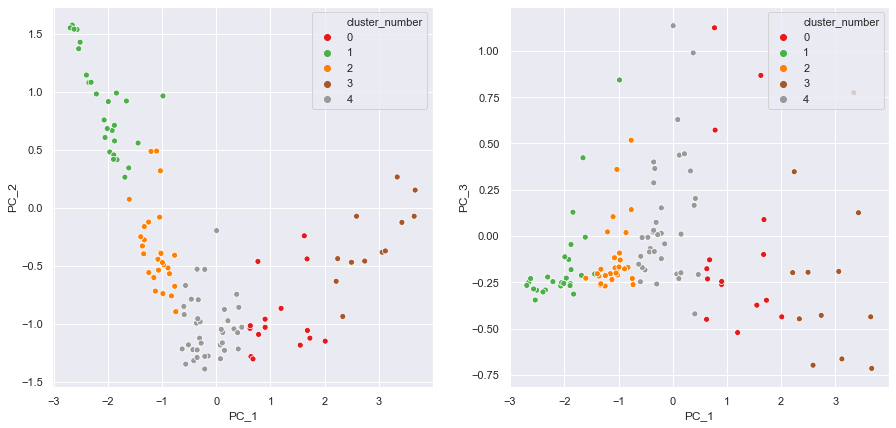

In [91]:
# inference : again we see that there are quite a good number of countries under each clsuter . 

# lets plot these componenets on a scatter plot to understand the intra distance among the datapoints : 

fig,axes =plt.subplots(1,2,figsize=(15,7))
sns.scatterplot(x='PC_1', y='PC_2', hue='cluster_number',legend='full',palette="Set1",data=df_pcas_final,ax=axes[0])
sns.scatterplot(x='PC_1', y='PC_3', hue='cluster_number',legend='full',palette="Set1",data=df_pcas_final,ax=axes[1])

In [92]:
# inference : we got a better view of the datapoints spread with k=5 , when compared to that of k=4 , the intra distance ampng the datapoints
# of the same cluster seems to be less compared to k=4

# lets visualise the whole of the data on the original attributes using PCA . 

df_merge=pd.merge(df_help,df_pcas_final,on='country')
df_merge_cols=df_merge[['country','child_mort','exports','imports','health','income','inflation','life_expec','total_fer','gdpp','cluster_number']]

# Mean values DF : 

cluster_child=pd.DataFrame(df_merge_cols.groupby(["cluster_number"]).child_mort.mean())
cluster_export=pd.DataFrame(df_merge_cols.groupby(["cluster_number"]).exports.mean())
cluster_import=pd.DataFrame(df_merge_cols.groupby(["cluster_number"]).imports.mean())
cluster_health=pd.DataFrame(df_merge_cols.groupby(["cluster_number"]).health.mean())
cluster_income=pd.DataFrame(df_merge_cols.groupby(["cluster_number"]).income.mean())
cluster_inflation=pd.DataFrame(df_merge_cols.groupby(["cluster_number"]).inflation.mean())

cluster_life_exp=pd.DataFrame(df_merge_cols.groupby(["cluster_number"]).life_expec.mean())
cluster_fert=pd.DataFrame(df_merge_cols.groupby(["cluster_number"]).total_fer.mean())
cluster_gdpp=pd.DataFrame(df_merge_cols.groupby(["cluster_number"]).gdpp.mean())

df_concat=pd.concat([pd.Series([0,1,2,3,4]),cluster_child,cluster_export,cluster_import,cluster_health,cluster_income,cluster_inflation,cluster_life_exp,
                    cluster_fert,cluster_gdpp],axis=1)


df_concat.columns=["cluster_number","Child_Mortality","Exports","Imports","Health_Spending","Income","Inflation","Life_Expectancy","Total_Fertility","GDPpercapita"]
df_concat.head()




,cluster_number,Child_Mortality,Exports,Imports,Health_Spending,Income,Inflation,Life_Expectancy,Total_Fertility,GDPpercapita
0,0,6.9000,8529.7667,8274.4800,1464.8807,25800.0000,488.3778,77.5533,1.7060,18460.0000
1,1,77.6074,549.9839,603.9199,85.4627,3038.8889,184.5205,61.5852,4.7585,1495.1111
2,2,38.8500,981.7357,1262.2000,162.4294,5936.0714,207.1174,67.5036,3.0389,2659.7143
3,3,4.7917,15252.1083,15067.5750,4284.6675,38116.6667,792.7864,80.8417,1.7850,40366.6667
4,4,17.8027,2532.2619,2696.5878,397.0771,12524.5946,437.4092,73.8405,2.1043,6298.6486


In [93]:
df_merge_cols.head(5)

,country,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,cluster_number
0,Afghanistan,90.2000,55.3000,248.2970,41.9174,1610,52.2032,56.2000,5.8200,553,1
1,Algeria,27.3000,1712.6400,1400.4400,185.9820,12900,718.0600,76.5000,2.8900,4460,4
2,Antigua and Barbuda,10.3000,5551.0000,7185.8000,735.6600,19100,175.6800,76.8000,2.1300,12200,4
3,Armenia,18.1000,669.7600,1458.6600,141.6800,6700,250.1940,73.3000,1.6900,3220,4
4,Australia,4.8000,10276.2000,10847.1000,4530.8700,41400,602.0400,82.0000,1.9300,51900,3


In [ ]:
# Inference : we can understand from the business standpoint and from the question that Child mortality , income and gdp are the 
# key factors that decide the development of the country . we had also worked on the principal components and found that these 
# variables have a good PCA SCORE . lets proceed with analaysing all these 3 components for building meangful clusters 

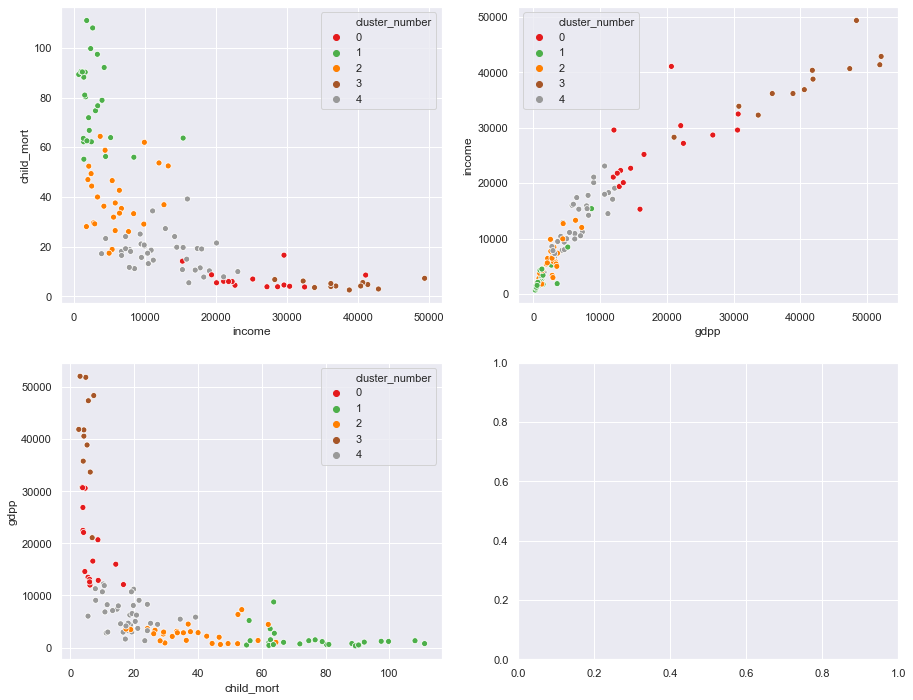

In [95]:
# scatter plot with original features of the dataframe :

fig,axes =plt.subplots(2,2,figsize=(15,12))
sns.scatterplot(x='income', y='child_mort', hue='cluster_number',legend='full',palette="Set1",data=df_merge_cols,ax=axes[0][0])
sns.scatterplot(x='gdpp', y='income', hue='cluster_number',legend='full',palette="Set1",data=df_merge_cols,ax=axes[0][1])
sns.scatterplot(x='child_mort', y='gdpp', hue='cluster_number',legend='full',palette="Set1",data=df_merge_cols,ax=axes[1][0])



In [ ]:
#inference 1: there seems to be close relationship in forming the clusters of the countries with child_ mortality & income . countries
# with lower income levels have more child mortality and these form similar clusters . Thus aid is needed for such countries 
# inference 2 : with respect to income levels and gdpp mapping together , we can find that there exists close relationship between income 
# and gdpp of the nations , the more income , the more purchasing capacity and the more production and more gdpp. in the above countries 
# where the cluster is formed with gdpp and income we can see that many countries have less than 10000 level of gdpp with very low income levels close to 0-10000
# on the other hands we can see that most countries fall under such cluster where the gdpp and income levels are at 10000 mark
# we can also see some countries which have very high income and high gdpp which group under similar cluster 
# inference 3 : the next elements  to check are the clusters formed based on gdpp and child mortality . as we can see that most of the 
# countries account for such cluster that has child mortality rate between 0to 20 levels with low gdpp and next category comes with those 
# with child mortality between 20 to 50 levels and gdpp still less than 10000 mark. we need to extend financial aaid to such countries 

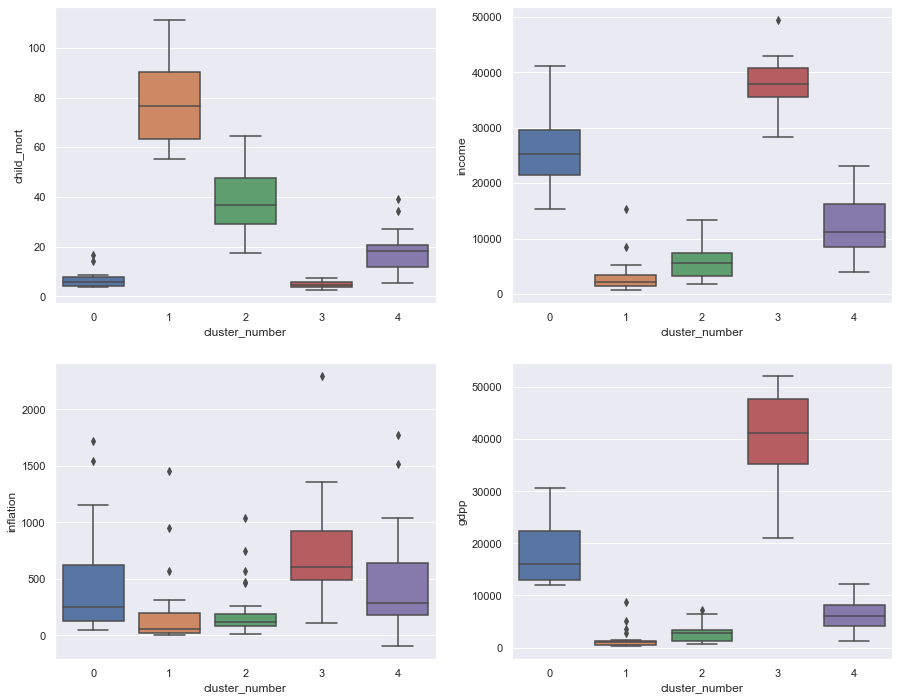

In [99]:
# Now lets plot the box plots to see if there are any outliers / how the spread of datapoints /countries is with respect to these 
#  parameters : child mortality , income , gdpp& inflation levels.


# Box plot of original features: 

fig, axes=plt.subplots(2,2,figsize=(15,12))

sns.boxplot(x='cluster_number',y='child_mort',data=df_merge_cols,ax=axes[0][0])
sns.boxplot(x='cluster_number',y='income',data=df_merge_cols,ax=axes[0][1])
sns.boxplot(x='cluster_number',y='inflation',data=df_merge_cols,ax=axes[1][0])
sns.boxplot(x='cluster_number',y='gdpp',data=df_merge_cols,ax=axes[1][1])


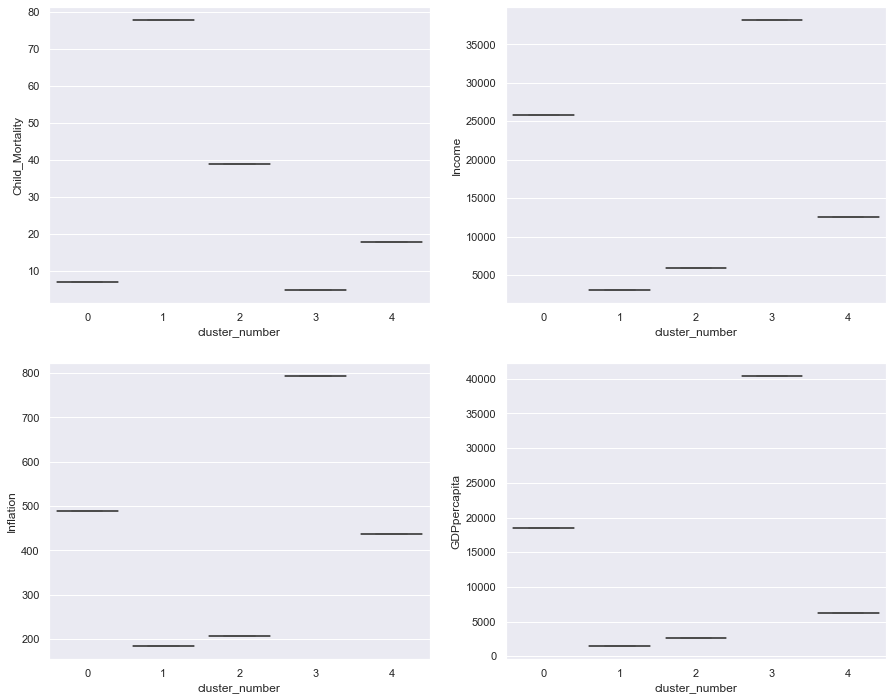

In [103]:
# inferences : Child mortality is more for clusters 0 & 3 . thus these need help to improve 
# similarly income and gdpp seems low for clusters 0 & 3 . thus these also need help . 

# its noticed that the countries that fall under clusters 0 & 3 are the most that are affected and hence need aid . 

# Lets see how the mean values of the variables are spread through box plot : 

fig, axes=plt.subplots(2,2,figsize=(15,12))

sns.boxplot(x='cluster_number',y='Child_Mortality',data=df_concat,ax=axes[0][0])
sns.boxplot(x='cluster_number',y='Income',data=df_concat,ax=axes[0][1])
sns.boxplot(x='cluster_number',y='Inflation',data=df_concat,ax=axes[1][0])
sns.boxplot(x='cluster_number',y='GDPpercapita',data=df_concat,ax=axes[1][1])



In [ ]:
# inference : the box plot of the mean values of the datapoints represent the same pattern as the original data points and their clusters

In [104]:
#List of countries in cluster 0 :

df_merge_cols[df_merge_cols['cluster_number']==0]


,country,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,cluster_number
6,Bahrain,8.6000,14386.5000,10536.3000,1028.7900,41100,1540.0800,76.0000,2.1600,20700,0
8,Barbados,14.2000,6320.0000,7792.0000,1275.2000,15300,51.3600,76.7000,1.7800,16000,0
21,Chile,8.7000,4863.3000,4037.7000,1026.8400,19400,1155.8400,79.1000,1.8800,12900,0
26,Croatia,5.5000,5076.0000,5143.5000,1047.6000,20100,110.8350,76.3000,1.5500,13500,0
33,Estonia,4.5000,10964.6000,10030.2000,880.3800,22700,254.0400,76.0000,1.7200,14600,0
41,Greece,3.9000,5944.9000,8258.3000,2770.7000,28700,181.0370,80.4000,1.4800,26900,0
45,Hungary,6.0000,10715.8000,10021.5000,960.2300,22300,305.2300,74.5000,1.2500,13100,0
51,Israel,4.6000,10710.0000,10067.4000,2334.7800,29600,541.6200,81.4000,3.0300,30600,0
63,Libya,16.6000,7937.6000,5094.1000,469.4800,29600,1718.2000,76.1000,2.4100,12100,0
64,Lithuania,6.1000,7836.0000,8064.0000,844.8000,21100,285.6000,73.2000,1.5000,12000,0


In [106]:
# list of countries in cluster 3 :
df_merge_cols[df_merge_cols['cluster_number']==3]

,country,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,cluster_number
4,Australia,4.8000,10276.2000,10847.1000,4530.8700,41400,602.0400,82.0000,1.9300,51900,3
19,Canada,5.6000,13793.4000,14694.0000,5356.2000,40700,1360.3800,81.3000,1.6300,47400,3
27,Cyprus,3.6000,15461.6000,17710.0000,1838.7600,33900,619.0800,79.9000,1.4200,30800,3
35,France,4.2000,10880.8000,11408.6000,4831.4000,36900,426.3000,81.4000,2.0300,40600,3
39,Germany,4.2000,17681.4000,15507.8000,4848.8000,40400,316.8440,80.1000,1.3900,41800,3
46,Iceland,2.6000,22374.6000,18142.7000,3938.6000,38800,2291.9300,82.0000,2.2000,41900,3
52,Italy,4.0000,9021.6000,9737.6000,3411.7400,36200,114.2020,81.7000,1.4600,35800,3
69,Malta,6.8000,32283.0000,32494.0000,1825.1500,28300,808.1300,80.3000,1.3600,21100,3
79,New Zealand,6.2000,10211.1000,9436.0000,3403.7000,32300,1257.0100,80.9000,2.1700,33700,3
101,Sweden,3.0000,24070.2000,21204.7000,5017.2300,42900,516.3110,81.5000,1.9800,52100,3


In [ ]:
# Thus we find the above list of countries based on KMeans clustering . lets look on the Hierarchial clustering :

# There are two types of Hierarichial clustering -> Divisive & Agglomerative . 



In [107]:
df_pcas_final_da.head()

,PC_1,PC_2,PC_3
0,-2.6541,1.5769,-0.2493
1,-0.3302,-0.7913,0.3648
2,0.4721,-1.0282,-0.2077
3,-0.4141,-1.3169,-0.0675
4,3.0629,-0.3815,-0.1912


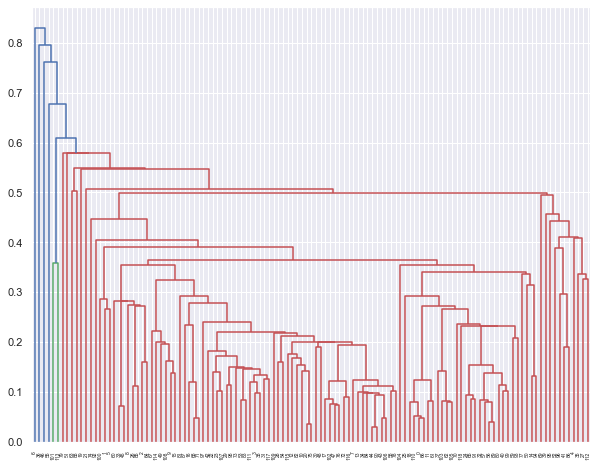

In [110]:
# Single linkage clustering : here the distance between two clusters is defined as the shortest distance between two points n each cluster . 

mer1=linkage(df_pcas_final_da,method='single',metric='euclidean')
dendrogram(mer1)
plt.show()

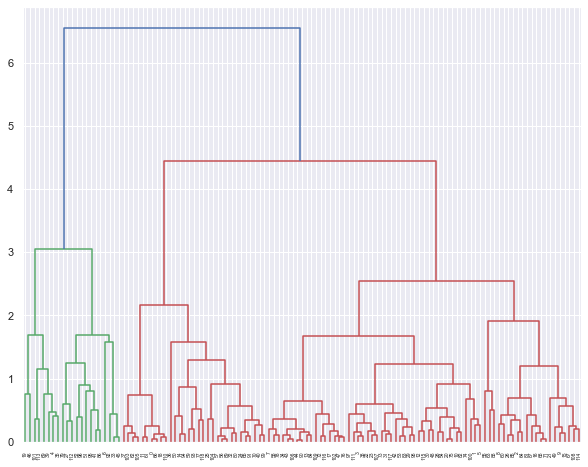

In [113]:
# complete linkage : here the distance between two clusters is defined as the longest distance between two points in each cluster.

mer1=linkage(df_pcas_final_da,method='complete',metric='euclidean')
dendrogram(mer1)
plt.show()

In [112]:
df_pcas_g=df_pcas_final.copy()
df_pcas_g=df_pcas_g.drop('cluster_number',axis=1)
df_pcas_g.head()

,country,PC_1,PC_2,PC_3
0,Afghanistan,-2.6541,1.5769,-0.2493
1,Algeria,-0.3302,-0.7913,0.3648
2,Antigua and Barbuda,0.4721,-1.0282,-0.2077
3,Armenia,-0.4141,-1.3169,-0.0675
4,Australia,3.0629,-0.3815,-0.1912


In [117]:
# checking for better cluster : 

clusterCut=pd.Series(cut_tree(mer1, n_clusters=4).reshape(-1,))
df_pg=pd.concat([df_pcas_g,clusterCut],axis=1)
df_pg.columns=['country','PC_1','PC_2','PC_3','cluster_number']


In [118]:
df_pg.head()

,country,PC_1,PC_2,PC_3,cluster_number
0,Afghanistan,-2.6541,1.5769,-0.2493,0
1,Algeria,-0.3302,-0.7913,0.3648,1
2,Antigua and Barbuda,0.4721,-1.0282,-0.2077,1
3,Armenia,-0.4141,-1.3169,-0.0675,1
4,Australia,3.0629,-0.3815,-0.1912,2


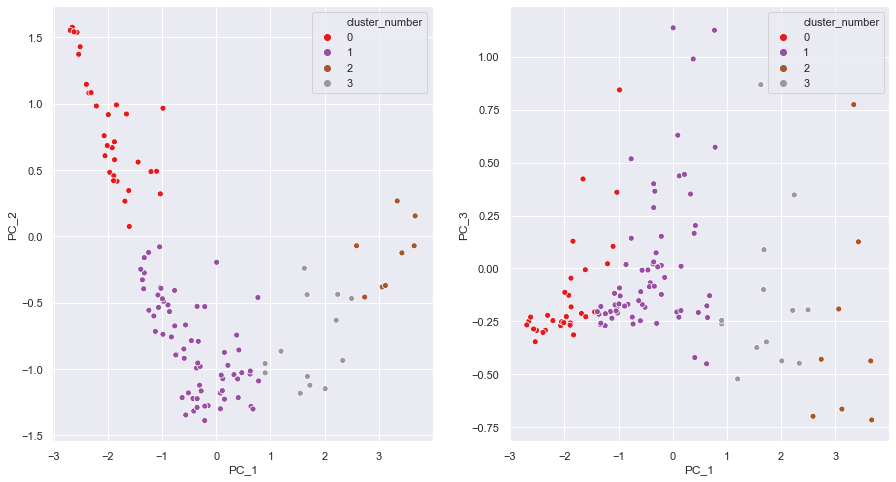

In [119]:
# SCATTER PLOT ON Principal components :

fig,axes =plt.subplots(1,2,figsize=(15,8))
sns.scatterplot(x='PC_1', y='PC_2', hue='cluster_number',legend='full',palette="Set1",data=df_pg,ax=axes[0])
sns.scatterplot(x='PC_1', y='PC_3', hue='cluster_number',legend='full',palette="Set1",data=df_pg,ax=axes[1])




In [123]:
# lets merge the dataframe of PCA with original dataframe :

df_merge_pg=pd.merge(df_help ,df_pg, on = 'country')
df_merge_cols_pg=df_merge[['country','child_mort','exports','imports','health','income','inflation','life_expec','total_fer','gdpp','cluster_number']]


In [124]:
df_merge_cols_pg.head()

,country,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,cluster_number
0,Afghanistan,90.2000,55.3000,248.2970,41.9174,1610,52.2032,56.2000,5.8200,553,1
1,Algeria,27.3000,1712.6400,1400.4400,185.9820,12900,718.0600,76.5000,2.8900,4460,4
2,Antigua and Barbuda,10.3000,5551.0000,7185.8000,735.6600,19100,175.6800,76.8000,2.1300,12200,4
3,Armenia,18.1000,669.7600,1458.6600,141.6800,6700,250.1940,73.3000,1.6900,3220,4
4,Australia,4.8000,10276.2000,10847.1000,4530.8700,41400,602.0400,82.0000,1.9300,51900,3


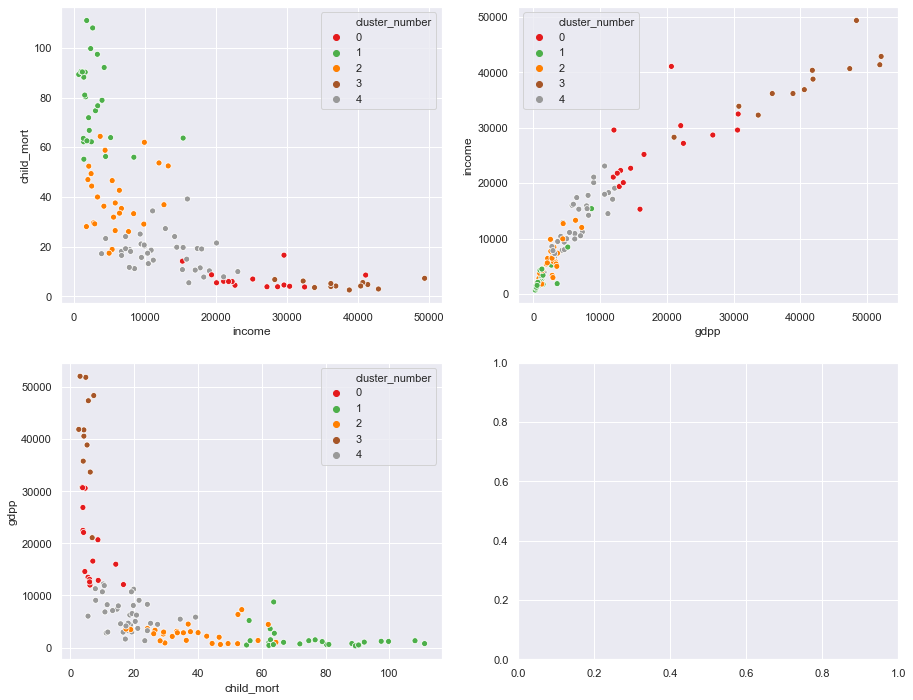

In [125]:
# scatter plot with original features of the dataframe :

fig,axes =plt.subplots(2,2,figsize=(15,12))
sns.scatterplot(x='income', y='child_mort', hue='cluster_number',legend='full',palette="Set1",data=df_merge_cols_pg,ax=axes[0][0])
sns.scatterplot(x='gdpp', y='income', hue='cluster_number',legend='full',palette="Set1",data=df_merge_cols_pg,ax=axes[0][1])
sns.scatterplot(x='child_mort', y='gdpp', hue='cluster_number',legend='full',palette="Set1",data=df_merge_cols_pg,ax=axes[1][0])


In [ ]:
# Inference : we can find that the clusters formed by KMeans and Hierarchial are different , but looking at the datapoints scattered 
# and aligned we can go ahead and build the model with KMeans clustering . 

# based on the above , we finally conclude the list of countries for clusters 0 & 3 that need aid . 



In [127]:
df_clust0=df_merge_cols[df_merge_cols['cluster_number'] ==0]

In [128]:
df_clust0.head()

,country,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,cluster_number
6,Bahrain,8.6000,14386.5000,10536.3000,1028.7900,41100,1540.0800,76.0000,2.1600,20700,0
8,Barbados,14.2000,6320.0000,7792.0000,1275.2000,15300,51.3600,76.7000,1.7800,16000,0
21,Chile,8.7000,4863.3000,4037.7000,1026.8400,19400,1155.8400,79.1000,1.8800,12900,0
26,Croatia,5.5000,5076.0000,5143.5000,1047.6000,20100,110.8350,76.3000,1.5500,13500,0
33,Estonia,4.5000,10964.6000,10030.2000,880.3800,22700,254.0400,76.0000,1.7200,14600,0


In [129]:
df_clust3=df_merge_cols[df_merge_cols['cluster_number'] ==3]

In [130]:
df_clust3.head()

,country,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,cluster_number
4,Australia,4.8000,10276.2000,10847.1000,4530.8700,41400,602.0400,82.0000,1.9300,51900,3
19,Canada,5.6000,13793.4000,14694.0000,5356.2000,40700,1360.3800,81.3000,1.6300,47400,3
27,Cyprus,3.6000,15461.6000,17710.0000,1838.7600,33900,619.0800,79.9000,1.4200,30800,3
35,France,4.2000,10880.8000,11408.6000,4831.4000,36900,426.3000,81.4000,2.0300,40600,3
39,Germany,4.2000,17681.4000,15507.8000,4848.8000,40400,316.8440,80.1000,1.3900,41800,3


In [132]:
# final details of the countries that need help (cluster 0 & 3) :

df_finals = df_clust0.append(df_clust3)


In [133]:
df_finals.head()

,country,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,cluster_number
6,Bahrain,8.6000,14386.5000,10536.3000,1028.7900,41100,1540.0800,76.0000,2.1600,20700,0
8,Barbados,14.2000,6320.0000,7792.0000,1275.2000,15300,51.3600,76.7000,1.7800,16000,0
21,Chile,8.7000,4863.3000,4037.7000,1026.8400,19400,1155.8400,79.1000,1.8800,12900,0
26,Croatia,5.5000,5076.0000,5143.5000,1047.6000,20100,110.8350,76.3000,1.5500,13500,0
33,Estonia,4.5000,10964.6000,10030.2000,880.3800,22700,254.0400,76.0000,1.7200,14600,0


In [134]:
# Lets see the mean values of the above dataframe final:
df_finals.describe()

,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,cluster_number
count,27.0000,27.0000,27.0000,27.0000,27.0000,27.0000,27.0000,27.0000,27.0000,27.0000
mean,5.9630,11517.4741,11293.6333,2718.1193,31274.0741,623.6705,79.0148,1.7411,28196.2963,1.3333
std,3.1486,6403.2929,5910.8810,1931.4219,8604.2741,577.3082,2.6464,0.4178,13511.9173,1.5191
min,2.6000,4863.3000,4037.7000,469.4800,15300.0000,49.1200,73.2000,1.2300,12000.0000,0.0000
25%,4.0500,7278.0000,8145.8000,1038.1950,23950.0000,195.0985,76.3000,1.4150,15300.0000,0.0000
50%,5.2000,10710.0000,10030.2000,2334.7800,30400.0000,516.3110,80.1000,1.6300,26900.0000,0.0000
75%,6.5000,13229.6000,12448.0000,3844.2800,37850.0000,753.2450,81.3500,1.9550,39750.0000,3.0000
max,16.6000,32283.0000,32494.0000,8663.6000,49400.0000,2291.9300,82.0000,3.0300,52100.0000,3.0000


In [135]:
df_final2=df_help[df_help['child_mort']>5.96]
df_final2.shape


(137, 10)

In [136]:
df_final2.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,137.0000,137.0000,137.0000,137.0000,137.0000,137.0000,137.0000,137.0000,137.0000
mean,45.7693,3339.9849,427.9881,2951.2252,12223.8175,565.2245,68.4540,3.2226,6720.3212
std,40.8617,6298.5329,849.9479,4397.7412,16386.6112,1116.0547,8.3955,1.5315,9816.9239
min,6.0000,1.0769,12.8212,0.6511,609.0000,-454.6800,32.1000,1.2500,231.0000
25%,14.6000,305.1000,56.6000,428.3140,2660.0000,57.3183,62.2000,2.0700,1170.0000
50%,28.1000,1199.2800,193.8550,1509.8400,7710.0000,174.1920,70.4000,2.6500,3450.0000
75%,64.4000,3171.1200,511.7100,3150.3300,15400.0000,538.7400,74.7000,4.5600,8200.0000
max,208.0000,43796.9000,8663.6000,32494.0000,125000.0000,6196.5000,80.9000,7.4900,70300.0000


In [137]:
# inference : we can see that the mean child mortality of the countries is around 45.77 with a mean income of 12223.8175 

# for our analysis we need the countries whose income is lesss than this value :

df_final3=df_final2[df_final2['income']<=12223.8175]
df_final3.shape

(91, 10)

In [138]:
df_final3.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,91.0000,91.0000,91.0000,91.0000,91.0000,91.0000,91.0000,91.0000,91.0000
mean,60.0330,804.7143,140.4866,1060.3447,4840.2527,192.0959,65.4286,3.7608,2283.8901
std,41.7305,881.6988,132.5232,953.8981,3354.0395,306.0935,8.1782,1.5326,1818.7879
min,6.9000,1.0769,12.8212,0.6511,609.0000,5.7584,32.1000,1.2700,231.0000
25%,24.1000,135.5150,43.1613,279.7800,1835.0000,43.8563,59.8000,2.5600,748.0000
50%,53.7000,550.7600,85.9940,718.9600,3980.0000,92.6160,66.2000,3.4600,1480.0000
75%,89.7500,1218.2150,200.2320,1552.0700,7530.0000,227.2500,71.5500,5.0550,3380.0000
max,208.0000,5509.6000,650.8320,4643.4000,12000.0000,2423.2000,77.9000,7.4900,7370.0000


In [139]:
# lets check on the mean gdpp values : 

df_final4=df_final3[df_final3['gdpp']<=2283.8901]
df_final4.shape

(51, 10)

In [140]:
df_final4.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,51.0000,51.0000,51.0000,51.0000,51.0000,51.0000,51.0000,51.0000,51.0000
mean,82.1961,277.3909,55.6486,425.5891,2421.0392,82.0112,61.3843,4.4561,921.0588
std,38.2279,245.9514,36.8114,344.0282,1397.6442,74.8345,7.4659,1.3991,476.9373
min,17.2000,1.0769,12.8212,0.6511,609.0000,5.7584,32.1000,1.2700,231.0000
25%,55.7500,102.4975,31.5132,185.0670,1400.0000,26.7170,57.4000,3.2500,557.5000
50%,80.3000,180.4040,45.7442,302.8020,1990.0000,57.3183,61.7000,4.7500,769.0000
75%,104.5000,414.3930,67.5305,497.9650,3300.0000,104.6040,66.5500,5.3500,1300.0000
max,208.0000,943.2000,190.7100,1541.2600,6420.0000,309.1600,73.1000,7.4900,2180.0000


In [142]:
# after analaysing all the above features , below is the final list of countries that needs aid :

df_final4['country']


0      Afghanistan             
12     Bangladesh              
17     Benin                   
18     Bhutan                  
19     Bolivia                 
25     Burkina Faso            
26     Burundi                 
27     Cambodia                
28     Cameroon                
31     Central African Republic
32     Chad                    
36     Comoros                 
37     Congo, Dem. Rep.        
40     Cote d'Ivoire           
50     Eritrea                 
56     Gambia                  
59     Ghana                   
63     Guinea                  
64     Guinea-Bissau           
66     Haiti                   
69     India                   
80     Kenya                   
81     Kiribati                
83     Kyrgyz Republic         
84     Lao                     
87     Lesotho                 
88     Liberia                 
93     Madagascar              
94     Malawi                  
97     Mali                    
99     Mauritania              
102    M

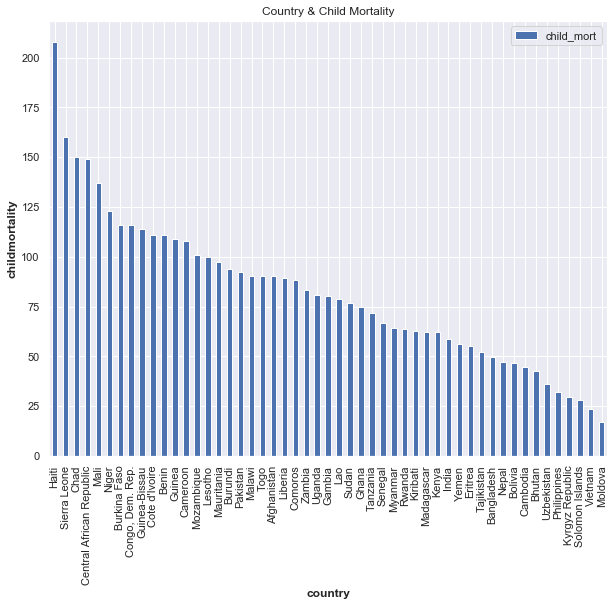

In [146]:
# lets plot the bar plot with individual parameters :

# low child mortality countries that needs aid :

df_list_cmo=pd.DataFrame(df_final4.groupby(['country'])['child_mort'].mean().sort_values(ascending=False))
df_list_cmo.plot.bar()
plt.title('Country & Child Mortality')
plt.xlabel("country",fontsize=12,fontweight='bold')
plt.ylabel("childmortality",fontsize=12,fontweight='bold')
plt.show()

In [ ]:
# imference : we can see the list of countries that have high child mortality than the average child mortality 



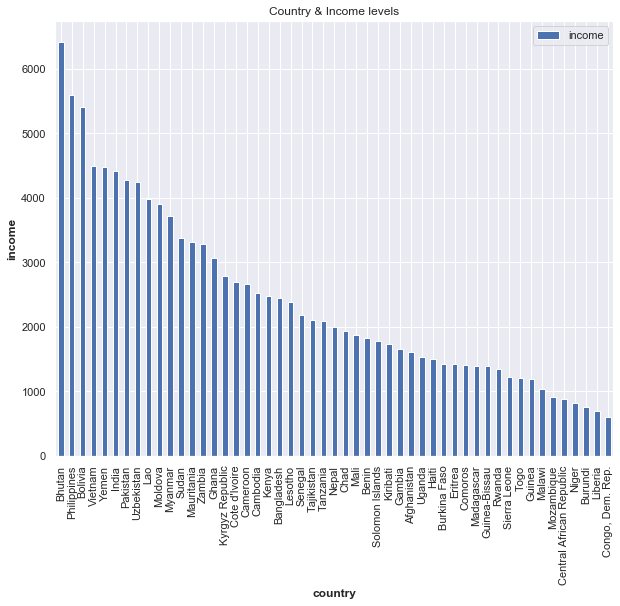

In [147]:
# income vs  countries that needs aid :

df_list_inc=pd.DataFrame(df_final4.groupby(['country'])['income'].mean().sort_values(ascending=False))
df_list_inc.plot.bar()
plt.title('Country & Income levels')
plt.xlabel("country",fontweight='bold')
plt.ylabel("income",fontsize=12,fontweight='bold')
plt.show()

In [ ]:
# above are the list of the contries that have low  income levels than the mean incomes 


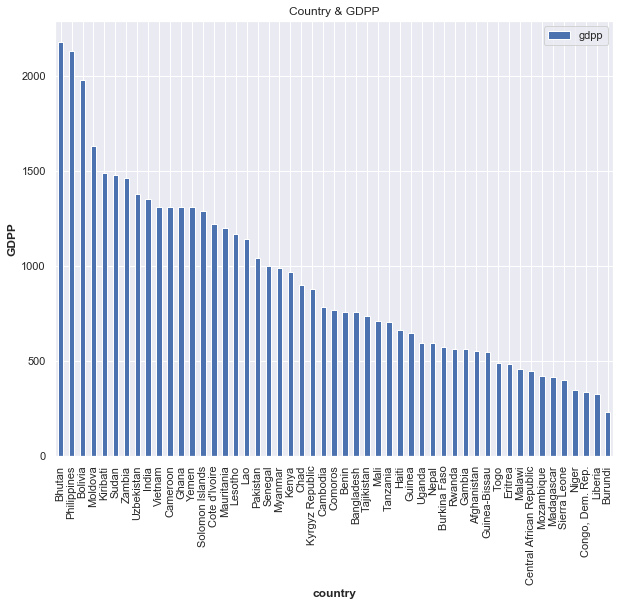

In [148]:
# gdpp countries that needs aid :

df_list_gdpp=pd.DataFrame(df_final4.groupby(['country'])['gdpp'].mean().sort_values(ascending=False))
df_list_gdpp.plot.bar()
plt.title('Country & GDPP')
plt.xlabel("country",fontweight='bold')
plt.ylabel("GDPP",fontsize=12,fontweight='bold')
plt.show()

In [ ]:
# above is the list of copunties that have low gdpp than the mean gdpp . 

In [ ]:
# Conclusion : from the above analaysis we can see the list of the countries that have high child mortality , low income and low gdpp 
# and that need aid . Hence  by using the concept of PCA , which inturn uses the concept of dimensionality reduction , we can 
# reduce the large number of dimensions into smaller parts and not losing any information of the original data , able to arruive at the 
# list of  countries that need aid to improve their current status .

In [150]:
df_list_help=df_final4.reset_index(drop=True).country
df_list_help

0     Afghanistan             
1     Bangladesh              
2     Benin                   
3     Bhutan                  
4     Bolivia                 
5     Burkina Faso            
6     Burundi                 
7     Cambodia                
8     Cameroon                
9     Central African Republic
10    Chad                    
11    Comoros                 
12    Congo, Dem. Rep.        
13    Cote d'Ivoire           
14    Eritrea                 
15    Gambia                  
16    Ghana                   
17    Guinea                  
18    Guinea-Bissau           
19    Haiti                   
20    India                   
21    Kenya                   
22    Kiribati                
23    Kyrgyz Republic         
24    Lao                     
25    Lesotho                 
26    Liberia                 
27    Madagascar              
28    Malawi                  
29    Mali                    
30    Mauritania              
31    Moldova                 
32    Mo